<a href="https://colab.research.google.com/drive/1P5ns1V48UwZ59UpfHVNKmXrsRUvCCUep?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg"  height="30"  alt="Open In Colab"/></a>

# Forest Cover Type Prediciton
## 1) Problem statement.

* Predicting forest cover type from cartographic variables only (no remotely sensed data). The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types).
* This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices
* these four wilderness areas: Neota (area 2) probably has the highest mean elevational value of the 4 wilderness areas. Rawah (area 1) and Comanche Peak (area 3) would have a lower mean elevational value, while Cache la Poudre (area 4) would have the lowest mean elevational value.

## 2) Data Collection.
* The Dataset is collected from UCI Repository -  https://archive.ics.uci.edu/dataset/31/covertype
* The data consists of 54 columns and 5,81,012 rows.

### 2.1 Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
pip install ucimlrepo

**Import direct from uci_repo**

In [16]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
features_data = covertype.data.features
target_data = covertype.data.targets


**Merging fratures data and target data into df**

In [20]:
df = pd.merge(features_data, target_data, left_index=True, right_index=True)
df

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
...           ...     ...    ...                               ...   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    0                              510   
1                                   -6                              390   
2                                   65                             3180   
3                                  118                             3090   
4                                   -1                              391   
...                                ...                              ...   
581007                              17                              108   
581008                              12                               95   
581009                               7                               90   
581010                               5                               90   
581011                               4                               67   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                 221             232            148   
1                 220             235            151   
2                 234             238            135   
3                 238             238            122   
4                 220             234            150   
...               ...             ...            ...   
581007            240             237            118   
581008            240             237            119   
581009            236             241            130   
581010            230             245            143   
581011            231             244            141   

        Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Soil_Type1  \
0                                     6279                 1           0   
1                                     6225                 1           0   
2                                     6121                 1           0   
3                                     6211                 1           0   
4                                     6172                 1           0   
...                                    ...               ...         ...   
581007                                 837                 0           0   
581008                                 845                 0           0   
581009                                 854                 0           0   
581010                                 864                 0           0   
581011                                 875                 0           0   

        Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  \
0                0           0           0           0           0   
1                0           0           0           0           0   
2                0           0           0           0           0   
3                0           0           0           0           0   
4                0           0           0           0           0   
...            ...         ...         ...         ...         ...   
581007           1           0           0           0           0   
581008           1           0           0           0           0   
581009           1           0           0        

#### Datatypes of the attributes and info

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

#### check the stats

In [22]:
pd.set_option('display.max_columns', None) # we need to see all the columns
df.describe()

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count  581012.000000                       581012.000000     581012.000000   
mean      142.528263                         1980.291226          0.448865   
std        38.274529                         1324.195210          0.497379   
min         0.000000                            0.000000          0.000000   
25%       119.000000                         1024.000000          0.000000   
50%       143.000000                         1710.000000          0.000000   
75%       168.000000                         2550.000000          1.000000   
max       254.000000                         7173.000000          1.000000   

          Soil_Type1     Soil_Type2     Soil_Type3     Soil_Type4  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.005217       0.012952       0.008301       0.021335   
std         0.072039       0.113066       0.090731       0.144499   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Soil_Type5     Soil_Type6     Soil_Type7     Soil_Type8  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.002749       0.011316       0.000181       0.000308   
std         0.052356       0.105775       0.013442       0.017550   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Soil_Type9    Soil_Type10    Soil_Type11    Soil_Type12  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.001974       0.056168       0.021359       0.051584   
std         0.044387       0.230245 

#### Insights
- Count is 581012 for each column, so no data point is missing.
- Soil type 7,15,8 and 36 are constant(each value is zero), so they can be removed.
- Wilderness_Area and Soil_Type are one hot encoded. Hence, they could be converted back for some analysis.
- Scales are not the same for all. Hence, rescaling and standardisation may be necessary for some algorithms.

#### Remove unnecessary columns

In [26]:
# keep a copy of df
df1 = df.copy()

remove_cols = []
for col in df1.columns:
  if df1[col].std() <= 0.02: # std dev can be considered as zero
    remove_cols.append(col)

# drop the columns
df1.drop(remove_cols, axis=1, inplace=True)
print(remove_cols)

['Soil_Type7', 'Soil_Type8', 'Soil_Type15', 'Soil_Type36']


#### **The target variable of our data i.e Cover_Type is one hot encoded.**
#### As our data is already **preprocessed** (one hot encoded) but we will  replace the foresteric values back to their original values for better analysis and data visualization.

In [30]:
df1.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type16', 'Soil_Type17',
       'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21',
       'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25',
       'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29',
       'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33',
       'Soil_Type34', 'Soil_Type35', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Cover_Type'],
      dtype='object')

In [31]:
df1['Cover_Type'].replace({1:'Spruce/Fir', 2:'Lodgepole Pine', 3:'Ponderosa Pine', 4:'Cottonwood/Willow', 5:'Aspen', 6:'Douglas-fir', 7:'Krummholz'}, inplace=True)

In [34]:
df1 = df1.rename(columns={"Wilderness_Area1":"Rawah_WA","Wilderness_Area2":"Neota_WA",
"Wilderness_Area3":"Comanche_Peak_WA","Wilderness_Area4":"Cache_la_Poudre_WA","Horizontal_Distance_To_Hydrology":"HD_Hydrology",
"Vertical_Distance_To_Hydrology":"VD_Hydrology","Horizontal_Distance_To_Roadways":"HD_Roadways",
                               "Horizontal_Distance_To_Fire_Points":"HD_Fire_Points"})

In [65]:
df2 = df1.copy()

# Correctly assign 'Wild Areas' based on which wilderness area column is 1
wilderness_cols = ['Rawah_WA', 'Neota_WA', 'Comanche_Peak_WA', 'Cache_la_Poudre_WA']
df2['Wild Areas'] = df2[wilderness_cols].idxmax(axis=1)

# Correctly assign 'Soil types' based on which soil type column is 1
soil_cols = [col for col in df2.columns if 'Soil_Type' in col]
df2['Soil types'] = df2[soil_cols].idxmax(axis=1)

df2['Wild Areas'].unique()

array(['Rawah_WA', 'Comanche_Peak_WA', 'Cache_la_Poudre_WA', 'Neota_WA'],
      dtype=object)

#### Drop the columns which are not required now

In [70]:
df2.drop(wilderness_cols + soil_cols, axis=1, inplace=True)  # dropping the unnecessary columns for now

In [74]:
# asign back to the df
df = df2
df

Elevation  Aspect  Slope  HD_Hydrology  VD_Hydrology  HD_Roadways  \
0            2596      51      3           258             0          510   
1            2590      56      2           212            -6          390   
2            2804     139      9           268            65         3180   
3            2785     155     18           242           118         3090   
4            2595      45      2           153            -1          391   
...           ...     ...    ...           ...           ...          ...   
581007       2396     153     20            85            17          108   
581008       2391     152     19            67            12           95   
581009       2386     159     17            60             7           90   
581010       2384     170     15            60             5           90   
581011       2383     165     13            60             4           67   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  HD_Fire_Points  \
0                 221             232            148            6279   
1                 220             235            151            6225   
2                 234             238            135            6121   
3                 238             238            122            6211   
4                 220             234            150            6172   
...               ...             ...            ...             ...   
581007            240             237            118             837   
581008            240             237            119             845   
581009            236             241            130             854   
581010            230             245            143             864   
581011            231             244            141             875   

            Cover_Type        Wild Areas   Soil types  
0                Aspen          Rawah_WA  Soil_Type29  
1                Aspen          Rawah_WA  Soil_Type29  
2       Lodgepole Pine          Rawah_WA  Soil_Type12  
3       Lodgepole Pine          Rawah_WA  Soil_Type30  
4                Aspen          Rawah_WA  Soil_Type29  
...                ...               ...          ...  
581007  Ponderosa Pine  Comanche_Peak_WA   Soil_Type2  
581008  Ponderosa Pine  Comanche_Peak_WA   Soil_Type2  
581009  Ponderosa Pine  Comanche_Peak_WA   Soil_Type2  
581010  Ponderosa Pine  Comanche_Peak_WA   Soil_Type2  
581011  Ponderosa Pine  Comanche_Peak_WA   Soil_Type2  

[581012 rows x 13 columns]

### Feature Information
* **Elevation :** Elevation in meters.
* **Aspect :** Aspect in degrees azimuth.
* **Slope :** Slope in degrees
* **Horizontal_Distance_To_Hydrology :**  Horz Dist to nearest surface water features
* **Vertical_Distance_To_Hydrology :** Vert Dist to nearest surface water features
* **Horizontal_Distance_To_Roadways :**Horz Dist to nearest roadway
* **Hillshade_9am (0 to 255 index):** Hillshade index at 9am, summer solstice.
* **Hillshade_Noon (0 to 255 index):**  Hillshade index at noon, summer solstice.
* **Hillshade_3pm (0 to 255 index) :**  Hillshade index at 3pm, summer solstice
* **Horizontal_Distance_To_Fire_Point :** Horz Dist to nearest wildfire ignition points
* **Wilderness_Area (4 binary columns, 0 = absence or 1 = presence)  :**Wilderness area designation
* **Soil_Type (40 binary columns, 0 = absence or 1 = presence):** Soil Type designation
* **Cover_Type (7 types, integers 1 to 7) :**  Forest Cover Type designation (target).

In [76]:
# Display summary statistics for a dataframe
df.describe()

Elevation         Aspect          Slope   HD_Hydrology  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704     269.428217   
std       279.984734     111.913721       7.488242     212.549356   
min      1859.000000       0.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000     108.000000   
50%      2996.000000     127.000000      13.000000     218.000000   
75%      3163.000000     260.000000      18.000000     384.000000   
max      3858.000000     360.000000      66.000000    1397.000000   

        VD_Hydrology    HD_Roadways  Hillshade_9am  Hillshade_Noon  \
count  581012.000000  581012.000000  581012.000000   581012.000000   
mean       46.418855    2350.146611     212.146049      223.318716   
std        58.295232    1559.254870      26.769889       19.768697   
min      -173.000000       0.000000       0.000000        0.000000   
25%         7.000000    1106.000000     198.000000      213.000000   
50%        30.000000    1997.000000     218.000000      226.000000   
75%        69.000000    3328.000000     231.000000      237.000000   
max       601.000000    7117.000000     254.000000      254.000000   

       Hillshade_3pm  HD_Fire_Points  
count  581012.000000   581012.000000  
mean      142.528263     1980.291226  
std        38.274529     1324.195210  
min         0.000000        0.000000  
25%       119.000000     1024.000000  
50%       143.000000     1710.000000  
75%       168.000000     2550.000000  
max       254.000000     7173.000000

## **3. EXPLORING DATA**

In [81]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hydrology', 'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'HD_Fire_Points']

We have 3 categorical features : ['Cover_Type', 'Wild Areas', 'Soil types']


### Numerical Features

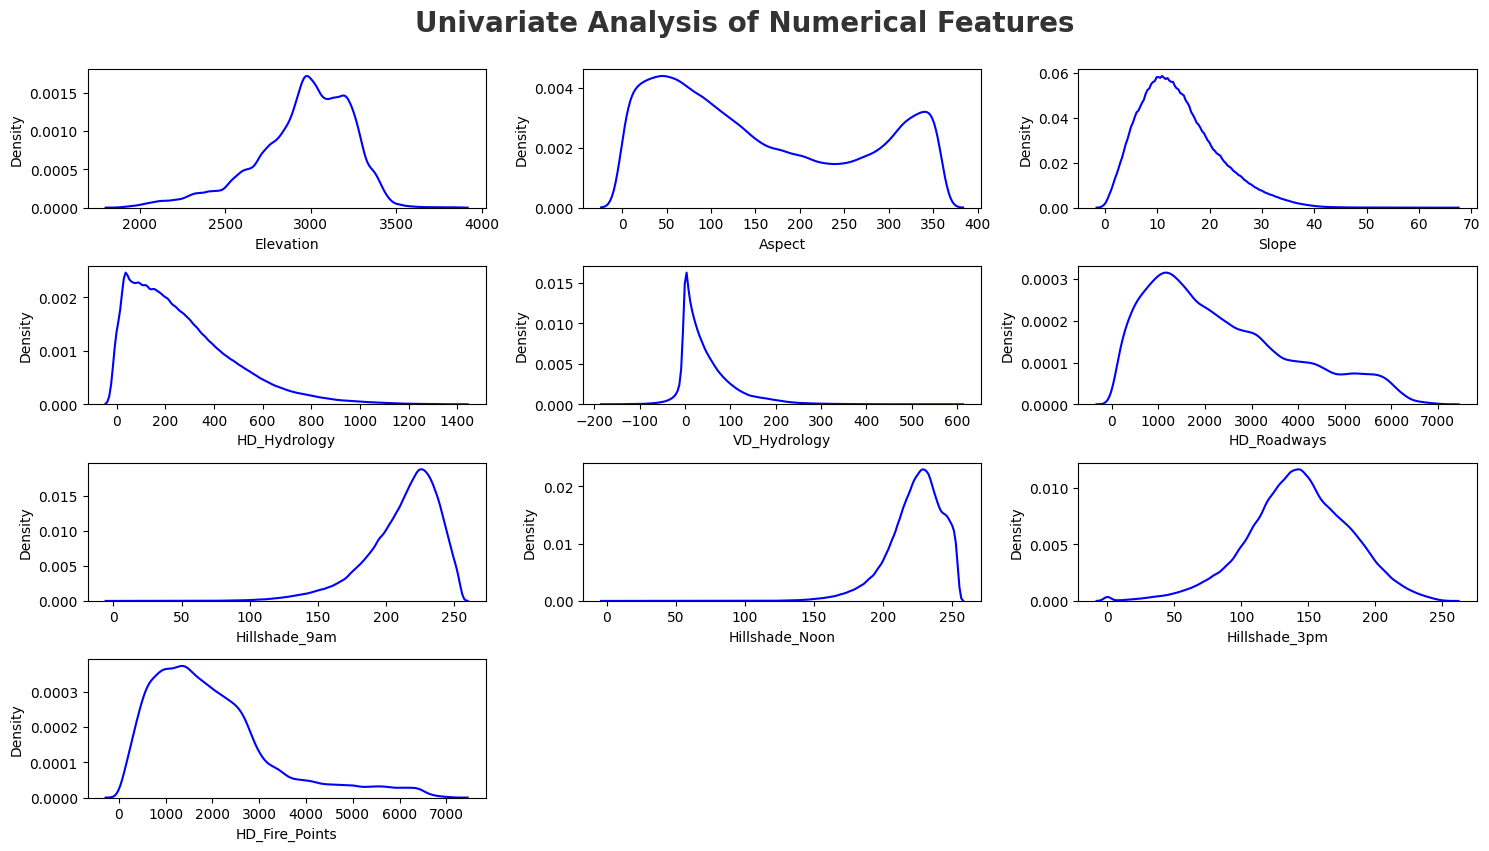

In [82]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


### Categorical Features

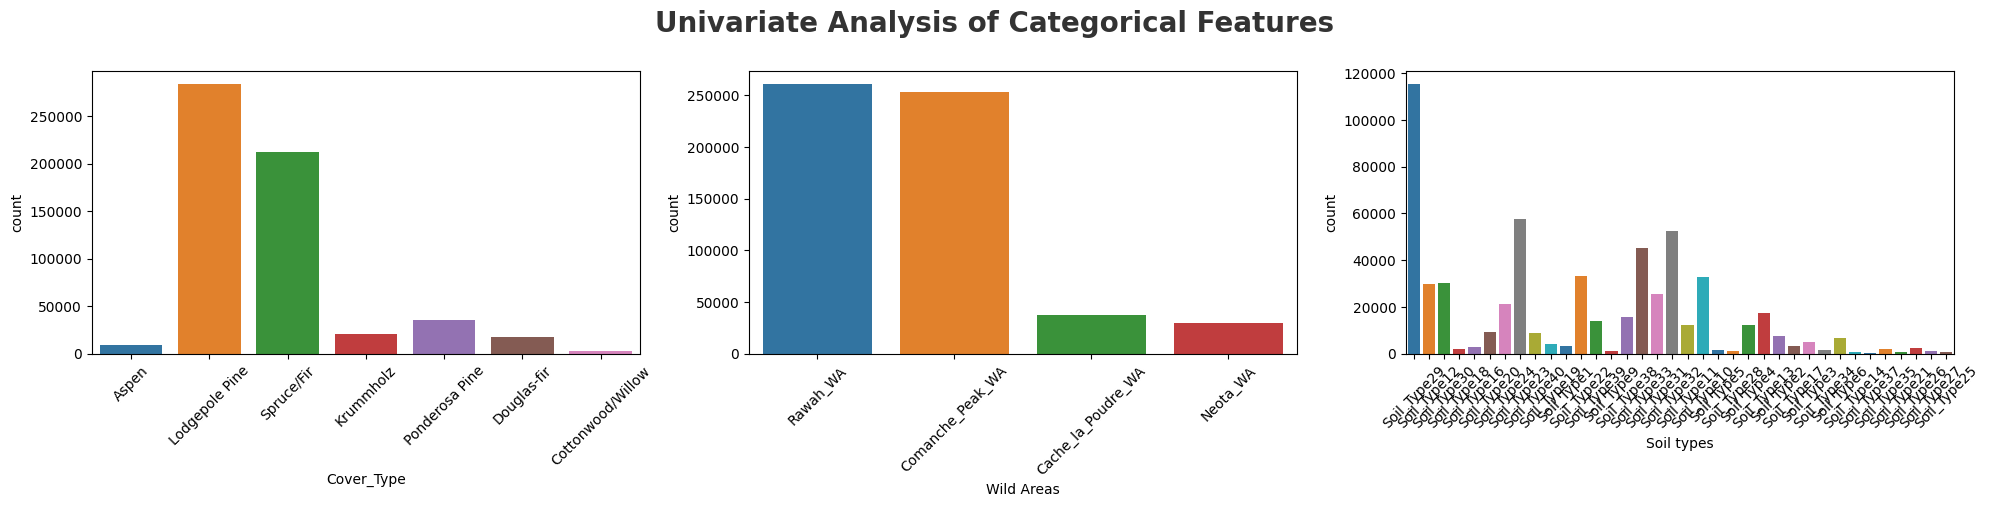

In [86]:
# categorical columns
plt.figure(figsize=(20, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[categorical_features[i]], palette = 'tab10')
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Multivariate Analysis
* Multivariate analysis is the analysis of more than one variable.

In [87]:
discrete_features=[feature for feature in numeric_features if (len(df[feature].unique())<=25 and len(df[feature].unique())>3)]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

encoded_categorical = [feature for feature in numeric_features if len(df[feature].unique()) <=3]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))
print('\nWe have {} encoded_categorical : {}'.format(len(encoded_categorical), encoded_categorical))

We have 0 discrete features : []

We have 10 continuous_features : ['Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hydrology', 'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'HD_Fire_Points']

We have 0 encoded_categorical : []


### Check Multicollinearity in Numerical features

In [91]:
df[continuous_features].corr()

Elevation    Aspect     Slope  HD_Hydrology  VD_Hydrology  \
Elevation        1.000000  0.015735 -0.242697      0.306229      0.093306   
Aspect           0.015735  1.000000  0.078728      0.017376      0.070305   
Slope           -0.242697  0.078728  1.000000     -0.010607      0.274976   
HD_Hydrology     0.306229  0.017376 -0.010607      1.000000      0.606236   
VD_Hydrology     0.093306  0.070305  0.274976      0.606236      1.000000   
HD_Roadways      0.365559  0.025121 -0.215914      0.072030     -0.046372   
Hillshade_9am    0.112179 -0.579273 -0.327199     -0.027088     -0.166333   
Hillshade_Noon   0.205887  0.336103 -0.526911      0.046790     -0.110957   
Hillshade_3pm    0.059148  0.646944 -0.175854      0.052330      0.034902   
HD_Fire_Points   0.148022 -0.109172 -0.185662      0.051874     -0.069913   

                HD_Roadways  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
Elevation          0.365559       0.112179        0.205887       0.059148   
Aspect             0.025121      -0.579273        0.336103       0.646944   
Slope             -0.215914      -0.327199       -0.526911      -0.175854   
HD_Hydrology       0.072030      -0.027088        0.046790       0.052330   
VD_Hydrology      -0.046372      -0.166333       -0.110957       0.034902   
HD_Roadways        1.000000       0.034349        0.189461       0.106119   
Hillshade_9am      0.034349       1.000000        0.010037      -0.780296   
Hillshade_Noon     0.189461       0.010037        1.000000       0.594274   
Hillshade_3pm      0.106119      -0.780296        0.594274       1.000000   
HD_Fire_Points     0.331580       0.132669        0.057329      -0.047981   

                HD_Fire_Points  
Elevation             0.148022  
Aspect               -0.109172  
Slope                -0.185662  
HD_Hydrology          0.051874  
VD_Hydrology         -0.069913  
HD_Roadways           0.331580  
Hillshade_9am         0.132669  
Hillshade_Noon        0.057329  
Hillshade_3pm        -0.047981  
HD_Fire_Points        1.000000

#### plotting cluster map

<Figure size 1200x1000 with 0 Axes>

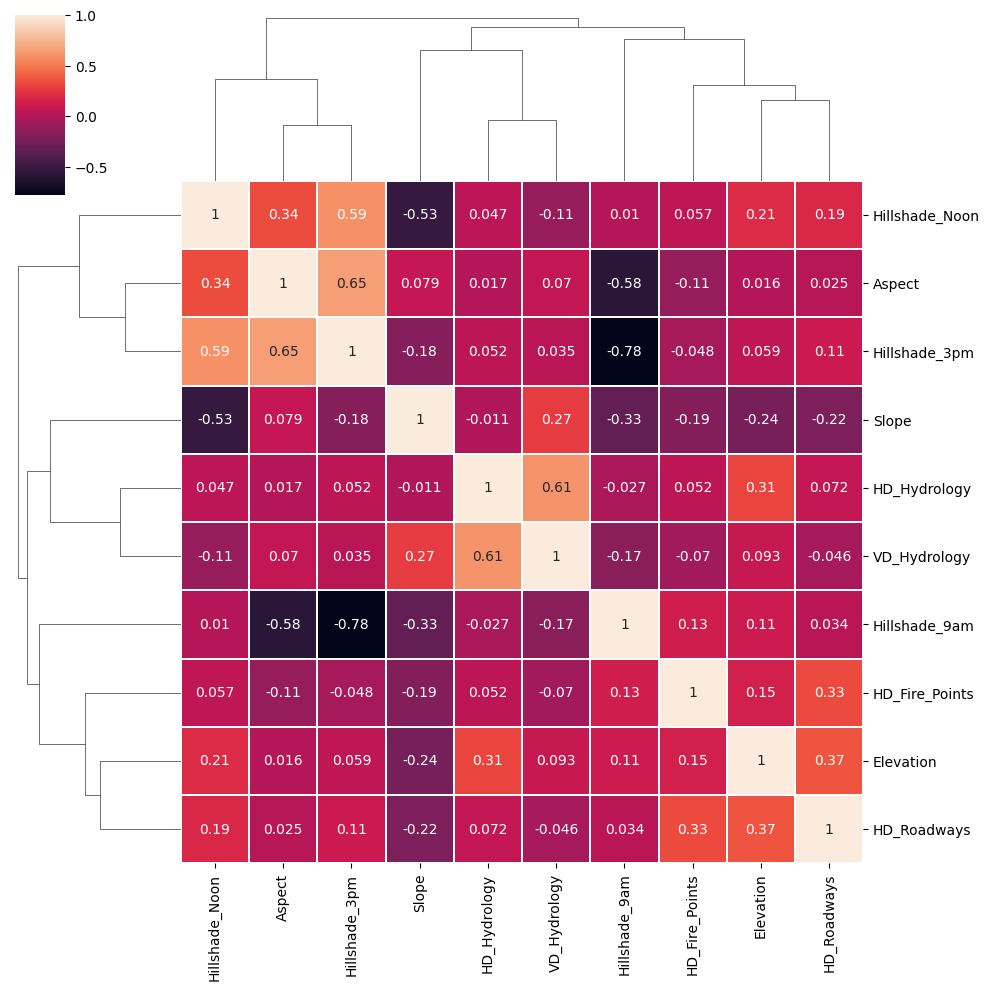

In [97]:
fig=plt.figure(figsize=(12,10))
sns.clustermap(df[continuous_features].corr(),annot=True,linewidths=.3,cmap='rocket')
plt.xticks(rotation=45)
plt.show()

#### Inferences (Correlated Features)
- Elevation and Horizontal Distance to Roadways.
- Aspect and Hillshade at 9am
- Aspect and Hillshade at 3pm
- Slope and Hillshade at Noon
- Horizontal Distance to hydrology and Vertical Distance to Hydrology
- Hillshade at 9am and Hillshade at 3pm
- Hillshade at 3pm and Hillshade at Noon

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e ProdTaken**

**Null Hypothesis ($ H_0 $)**: The Feature is independent of target column (No-Correlation)

**Alternative Hypothesis ($ H_1 $)**: The Feature and Target column are not independent (Correlated)

In [106]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
   #                                 target column
    if chi2_contingency(pd.crosstab(df['Cover_Type'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

Column       Hypothesis Result
0  Cover_Type  Reject Null Hypothesis
1  Wild Areas  Reject Null Hypothesis
2  Soil types  Reject Null Hypothesis

#### How is the data distribution of our target column 'Cover_Type' ?

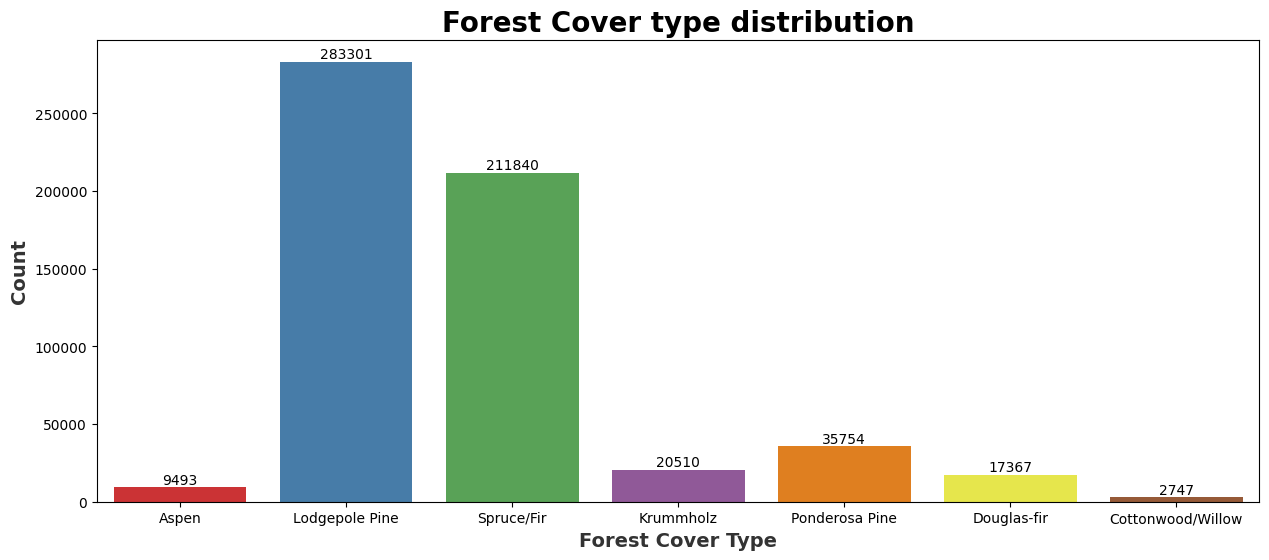

In [112]:
plt.figure(figsize=(15,6))
fig = sns.countplot(data=df, x="Cover_Type", palette='Set1')
for cont in fig.containers:
    fig.bar_label(cont)

plt.title('Forest Cover type distribution', fontsize=20, weight='bold')
plt.xlabel('Forest Cover Type', fontsize=14,weight='bold',alpha=0.8)
plt.ylabel('Count', fontsize=14,weight='bold',alpha=0.8)
plt.show()

#### INSIGHTS:
- we can see 'Lodgepole Pine' has **largest (283k)** forest cover.
- 'Cottonwood/Willow' has **lowest (2747)** forest cover.

### Which Wild area has what kind of Forest cover ?

Text(0, 0.5, 'Count')

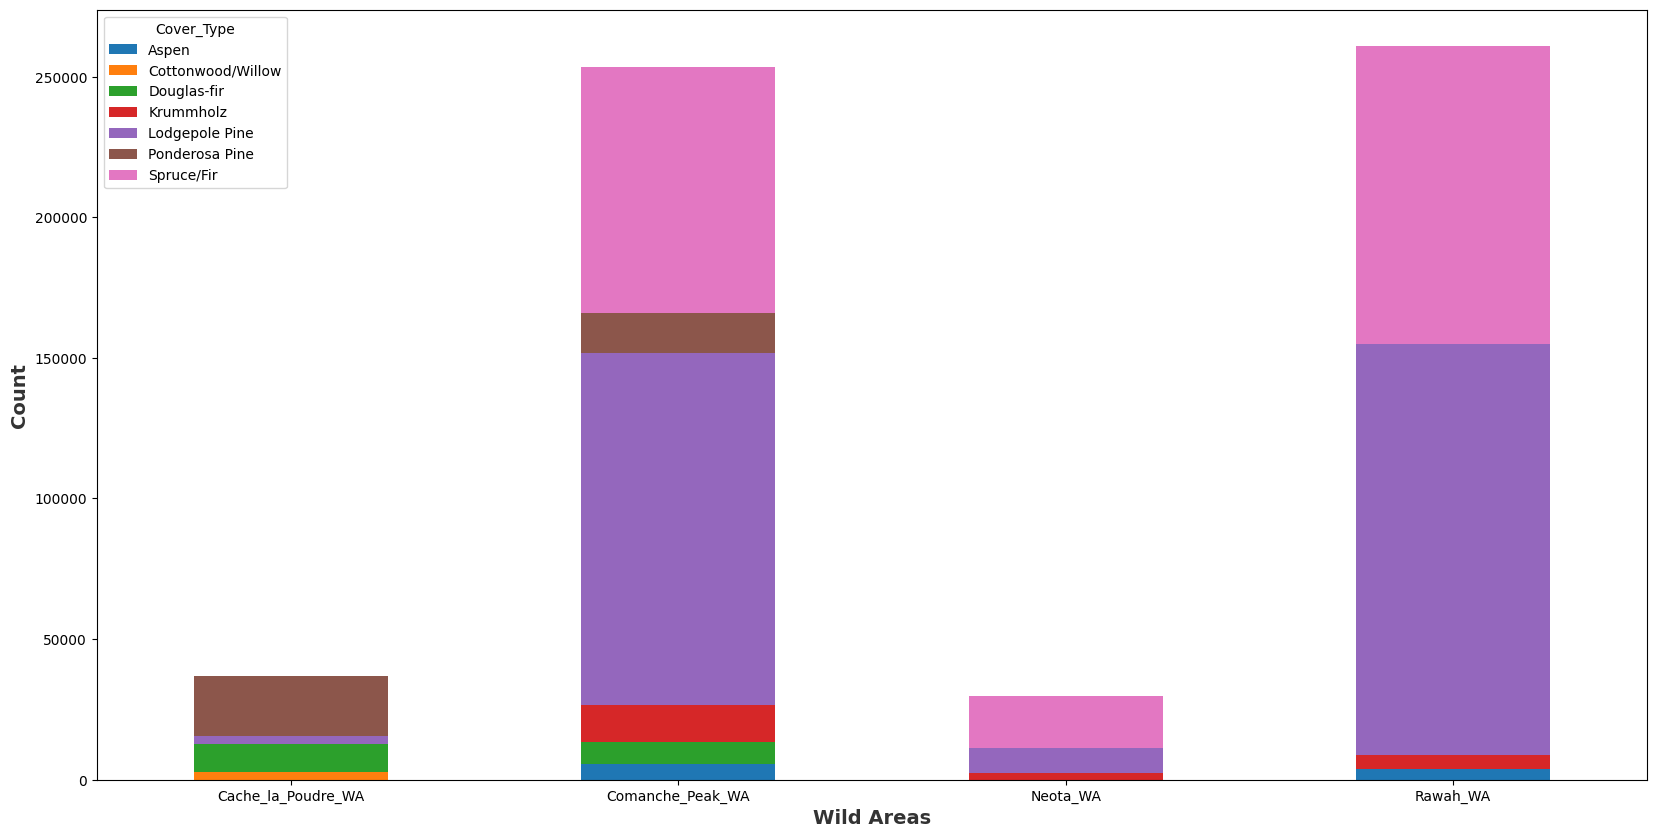

In [115]:
wild_area_cover_type=df.groupby(['Wild Areas'])['Cover_Type'].value_counts().unstack()
wild_area_cover_type.plot(kind='bar', stacked=True,figsize=(20,10))
plt.xticks(rotation=0)
plt.xlabel('Wild Areas', fontsize=14,weight='bold',alpha=0.8)
plt.ylabel('Count', fontsize=14,weight='bold',alpha=0.8)


#### INSIGHTS
- Cache_La_Poudre and Neota Wilderness Areas have same number of forest covers
- Comanche_Peak accounts for 42% of the total Wild Areas data.
- The least data is for Neota Wild Area i.e 3.3% in our data.
- We can also see that none of the wild areas have all the types of forest covers

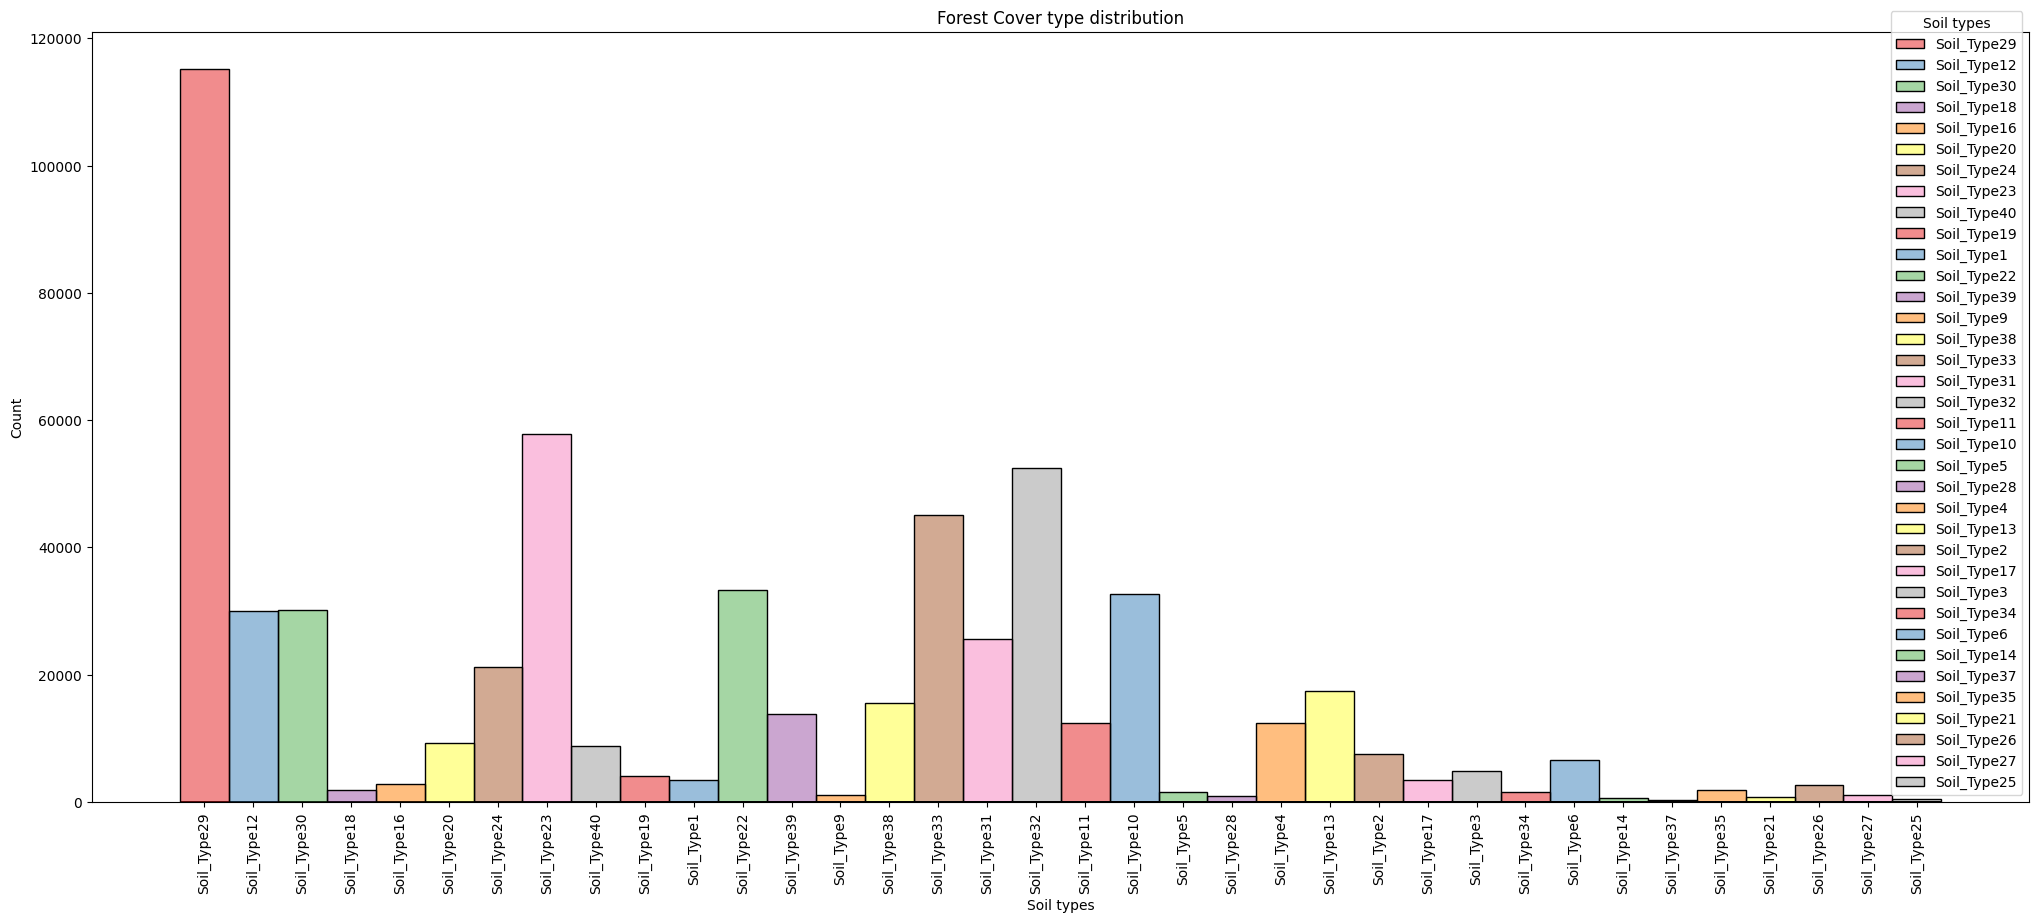

In [119]:
plt.figure(figsize=(25,10))
sns.histplot(data=df, x="Soil types", hue = 'Soil types', palette='Set1')
plt.title('Forest Cover type distribution')
plt.xticks(rotation=90)
plt.show()


#### INSIGHTS
- We have most of the data for soil type 29 and 23.
- Many soil types are rare in our data

### some scatter plots for visualization

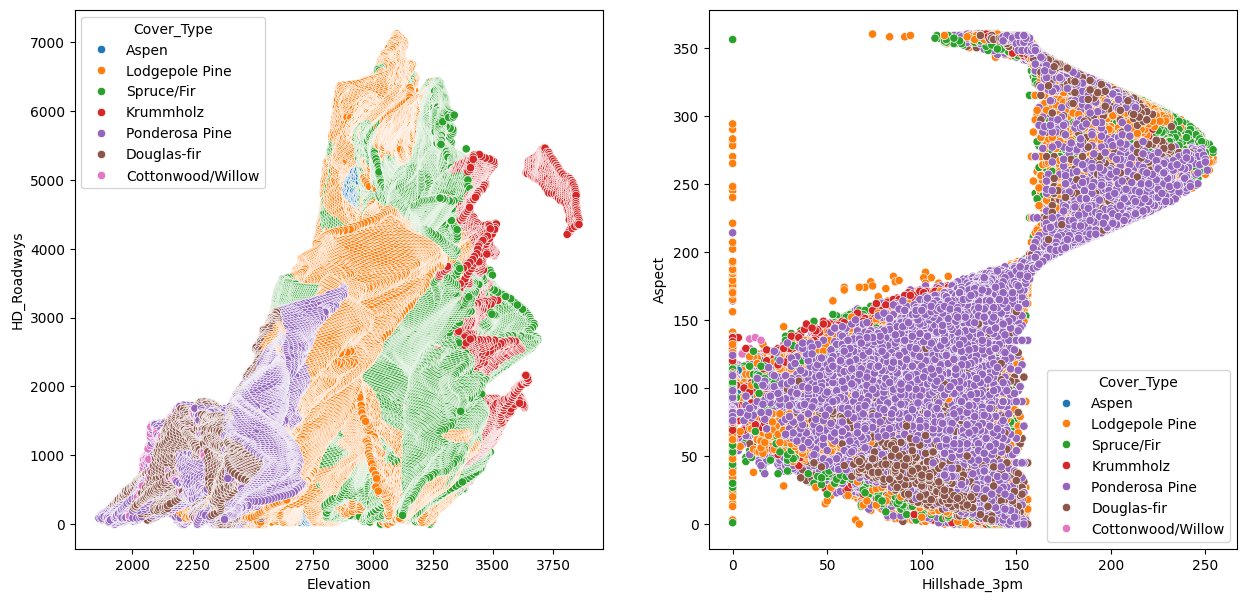

In [120]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.scatterplot(data=df,y='HD_Roadways',x='Elevation', hue='Cover_Type')
plt.subplot(122)
sns.scatterplot(data=df,y='Aspect',x='Hillshade_3pm', hue='Cover_Type')
plt.show()

#### INSIGHTS:
- We can see a positive correlation between Elevation and Distance to Roadways.
- Cottonwood trees have the lowest Elevation and distance to roadways compared to other forest covers.
- Douglas trees grow on lower elevated areas but higher than compared to cottonwood trees.
- All Krummholz trees grow on higher elevated areas but we can see a variation in their distance to roadways value.

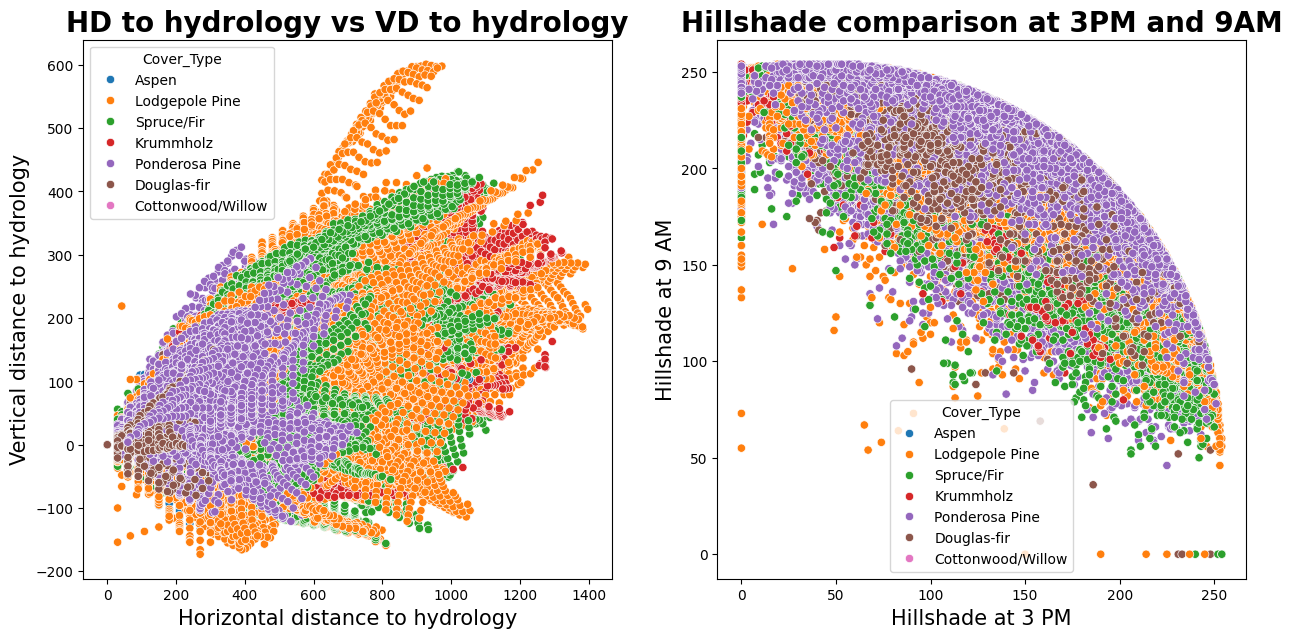

In [123]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.scatterplot(data=df,y='VD_Hydrology',x='HD_Hydrology', hue='Cover_Type')
plt.xlabel('Horizontal distance to hydrology',fontsize=15)
plt.ylabel('Vertical distance to hydrology',fontsize=15)
plt.title('HD to hydrology vs VD to hydrology',fontsize=20,weight='bold')

plt.subplot(122)
sns.scatterplot(data=df,y='Hillshade_9am',x='Hillshade_3pm', hue='Cover_Type')
plt.xlabel('Hillshade at 3 PM',fontsize=15)
plt.ylabel('Hillshade at 9 AM',fontsize=15)
plt.title('Hillshade comparison at 3PM and 9AM',fontsize=20,weight='bold')
plt.show()

#### INSIGHTS
- We can see positive correlation between both the distances to hydrology
- This graph is obvious as the shade at 9am will be opposite to the shade at 3pm on the area.
- We can see a negative correlation between hillshade index at 9am and 3pm

Text(0, 0.5, 'Horizontal Distance to Hydrology')

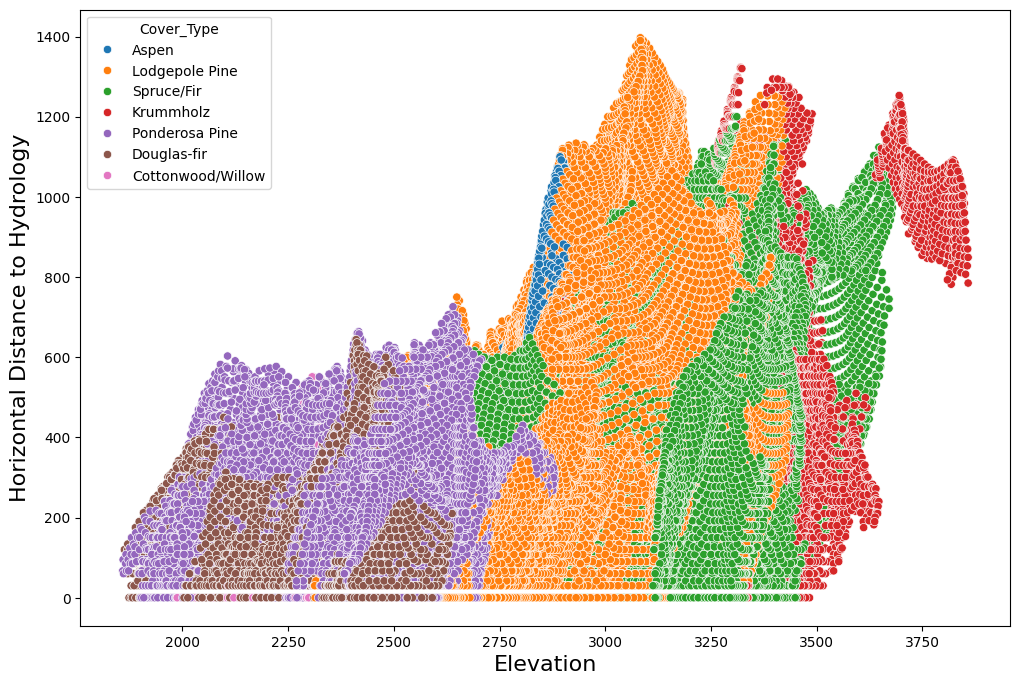

In [122]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,y='HD_Hydrology',x='Elevation', hue='Cover_Type')
plt.xlabel('Elevation',fontsize=16)
plt.ylabel('Horizontal Distance to Hydrology',fontsize=16)

### Box plots of numerical features

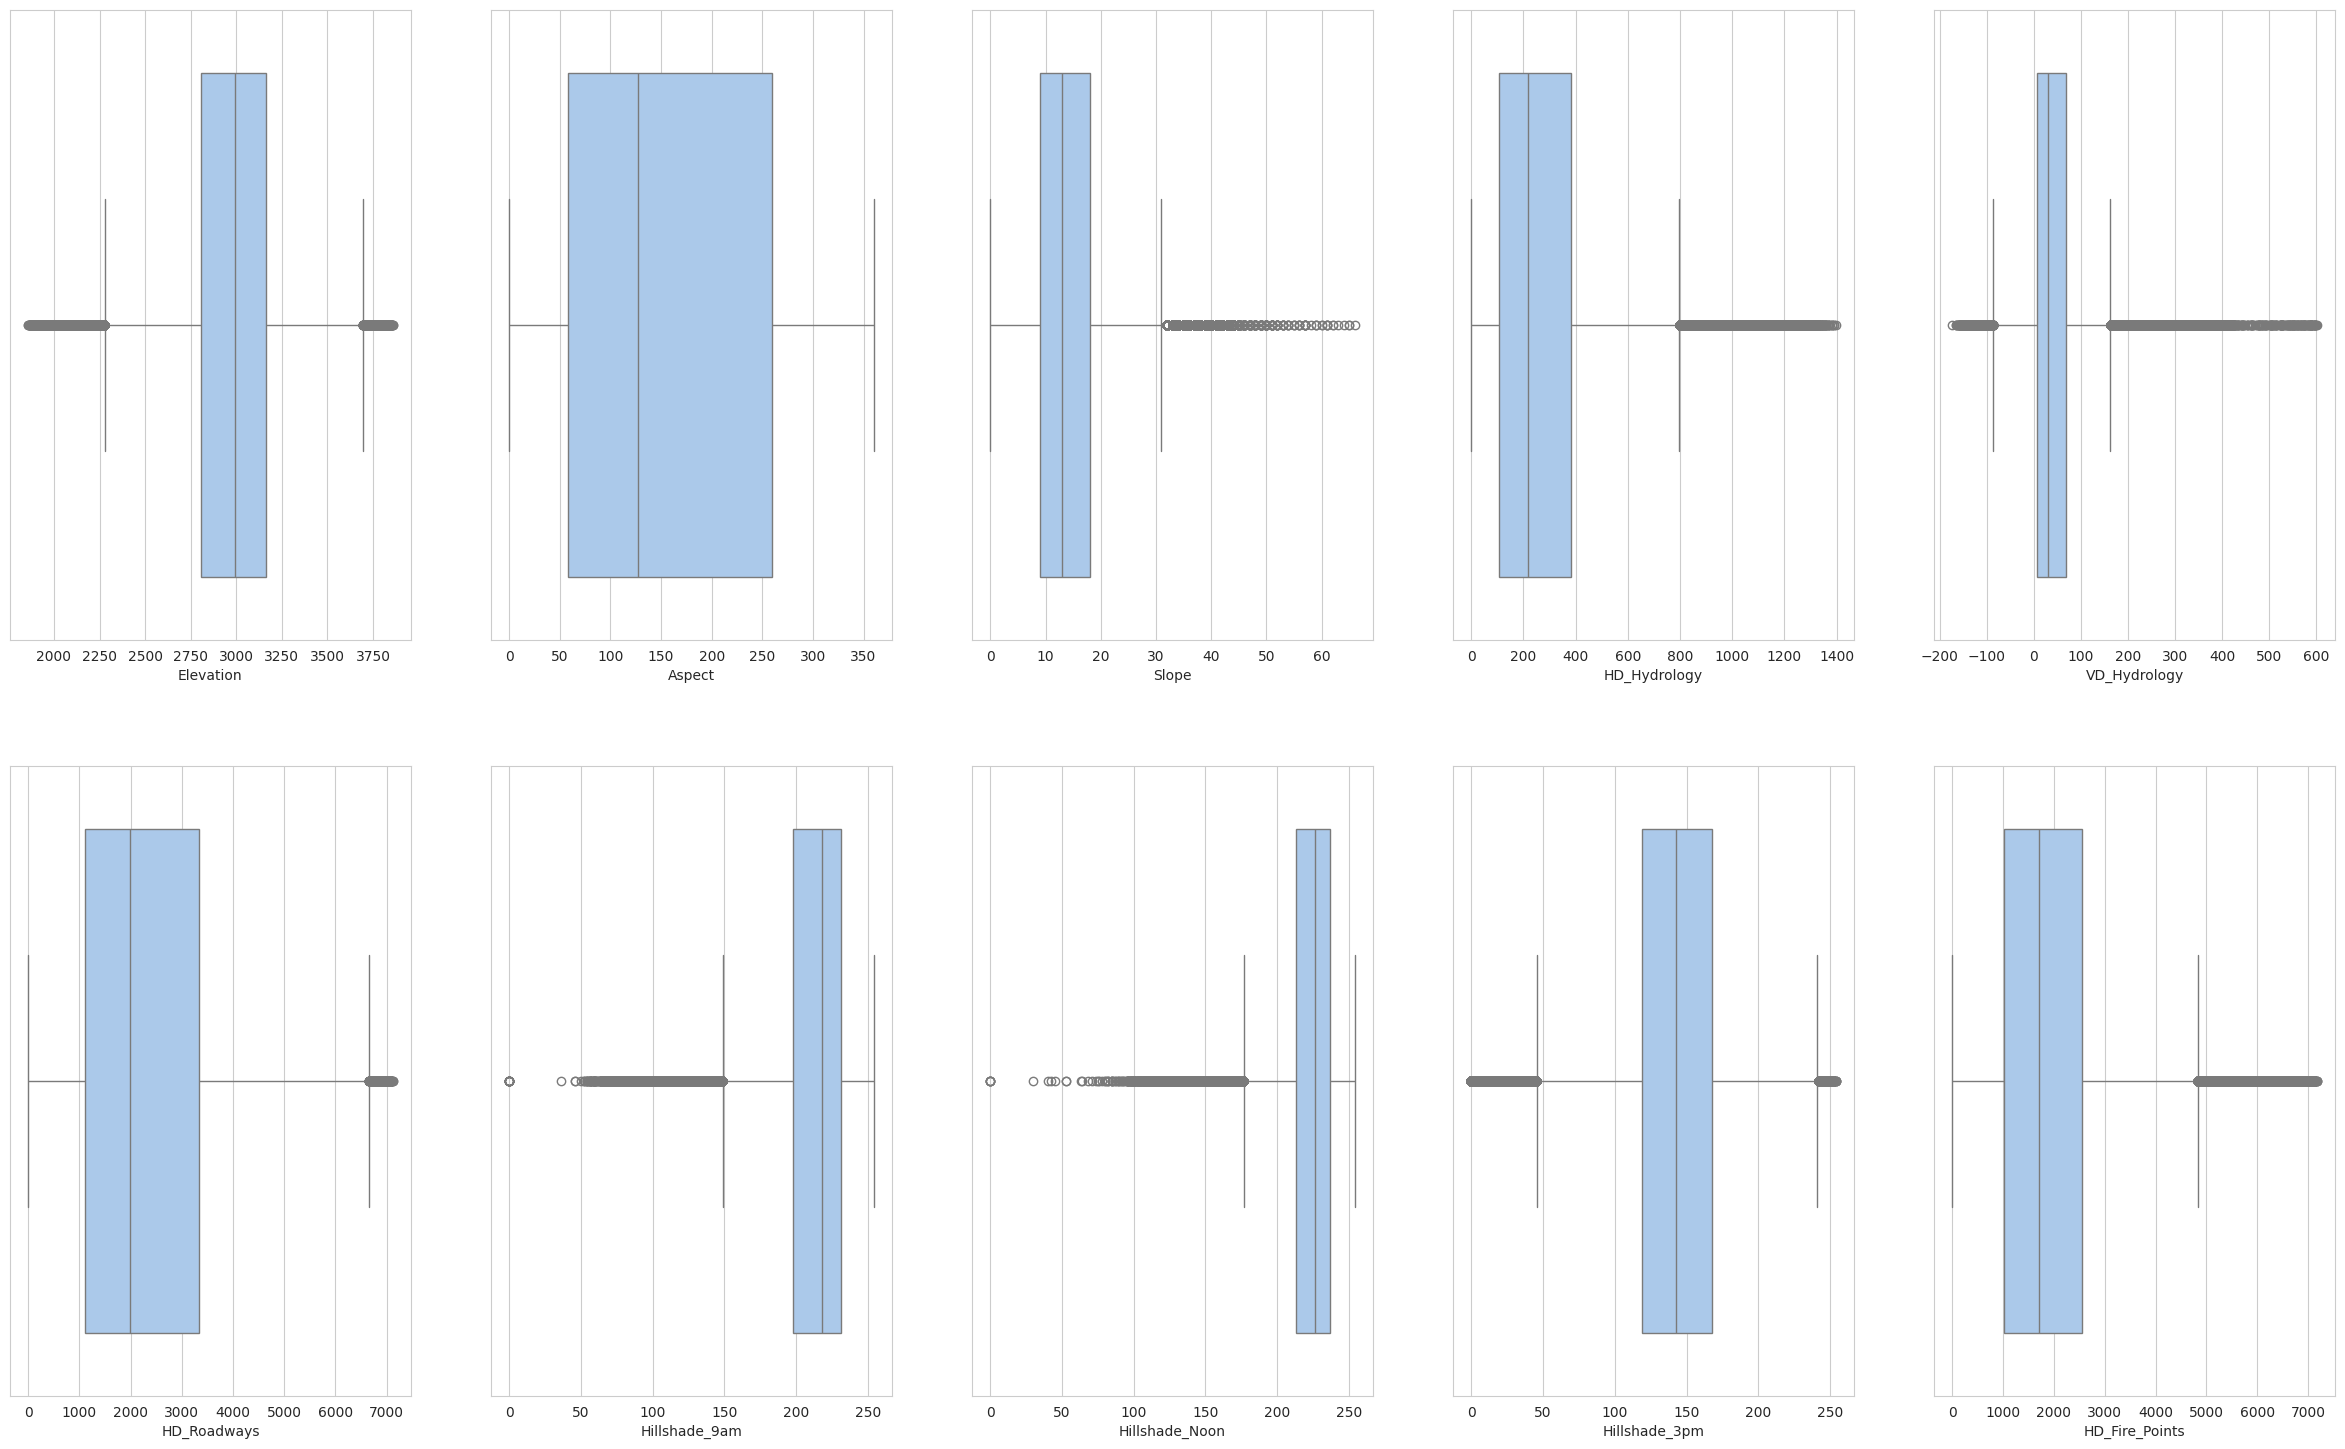

In [125]:
sns.set_style("whitegrid")
color = sns.color_palette('pastel')
plt.figure(figsize=(30,18))
for i,col in enumerate(numeric_features):
    plt.subplot(2,5,i+1)
    sns.boxplot(df[col], orient='h', palette=color)

#### INSIGIHTS
- Slope is the most squeezed box plot. It having a least range means that the median and mean will be quite close.
- Aspect features is the only one with little to none outliers.
- Elevation is the only feature that doesn't have a minimum value of 0. It is instead plotted in the middle having many outliers too.
- Horizontal_Distance_To_Roadways has the most spread out data of all features. This is because it has highest standard deviation score. Horizontal_Distance_To_Fire_Points has a similar look, but it has the maximum value.
- If we compare these two features, the last 50% of Horizontal_Distance_To_Roadways is much more spread and less dense compared to Horizontal_Distance_To_Fire_Points, hence having a high standard deviation score.

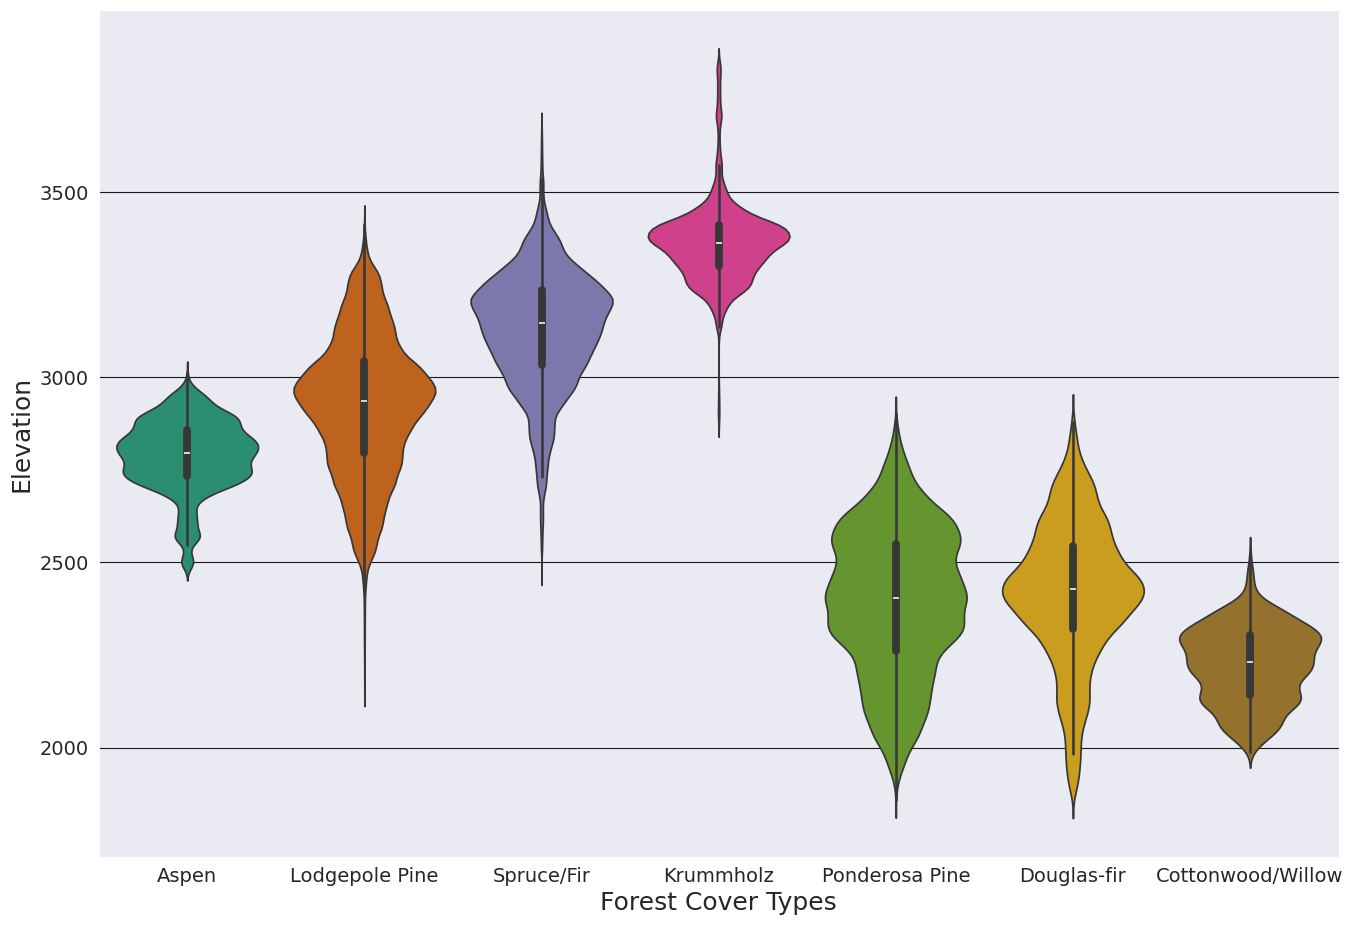

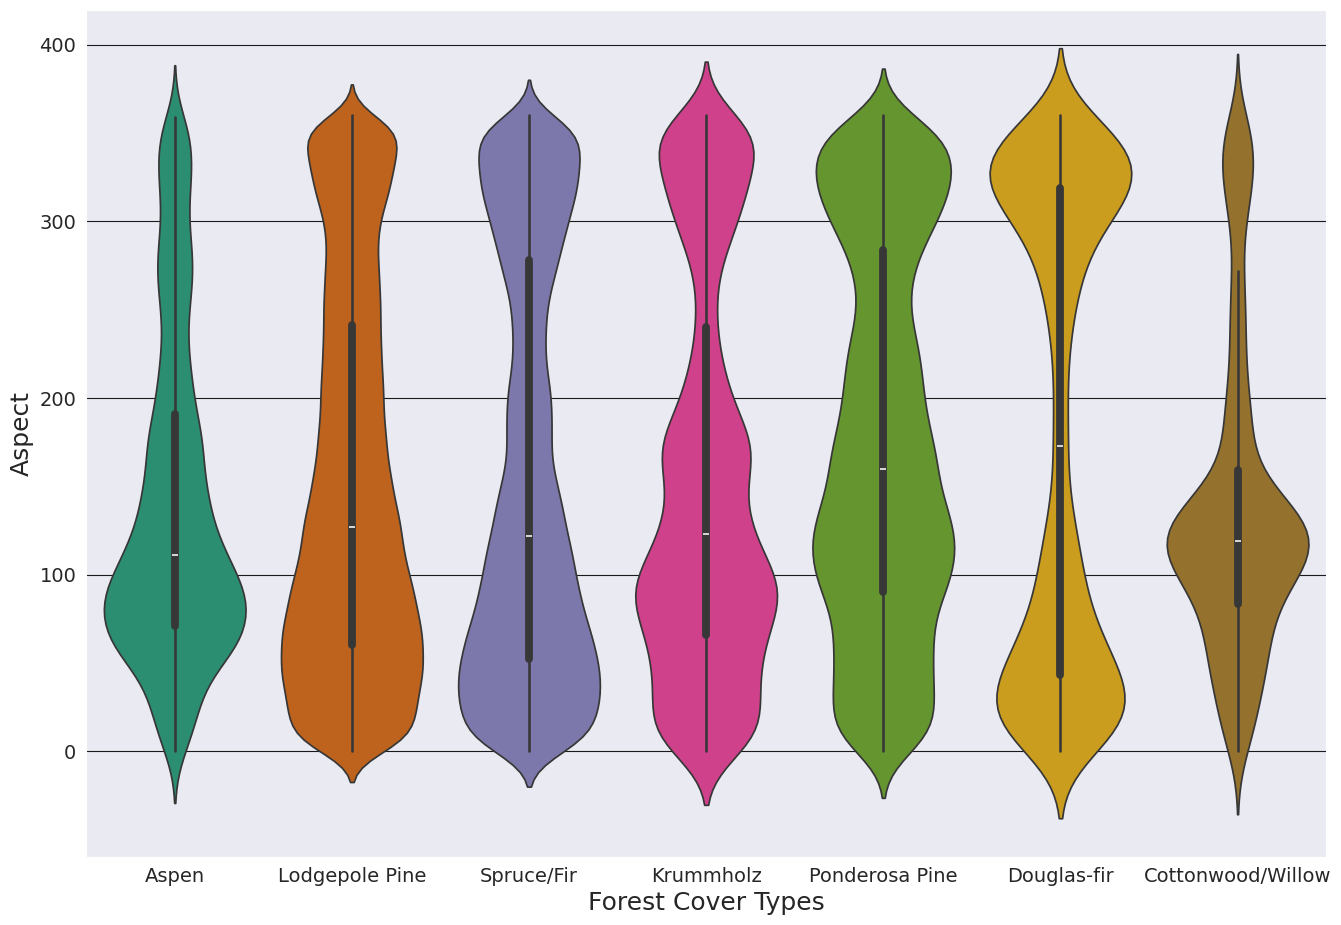

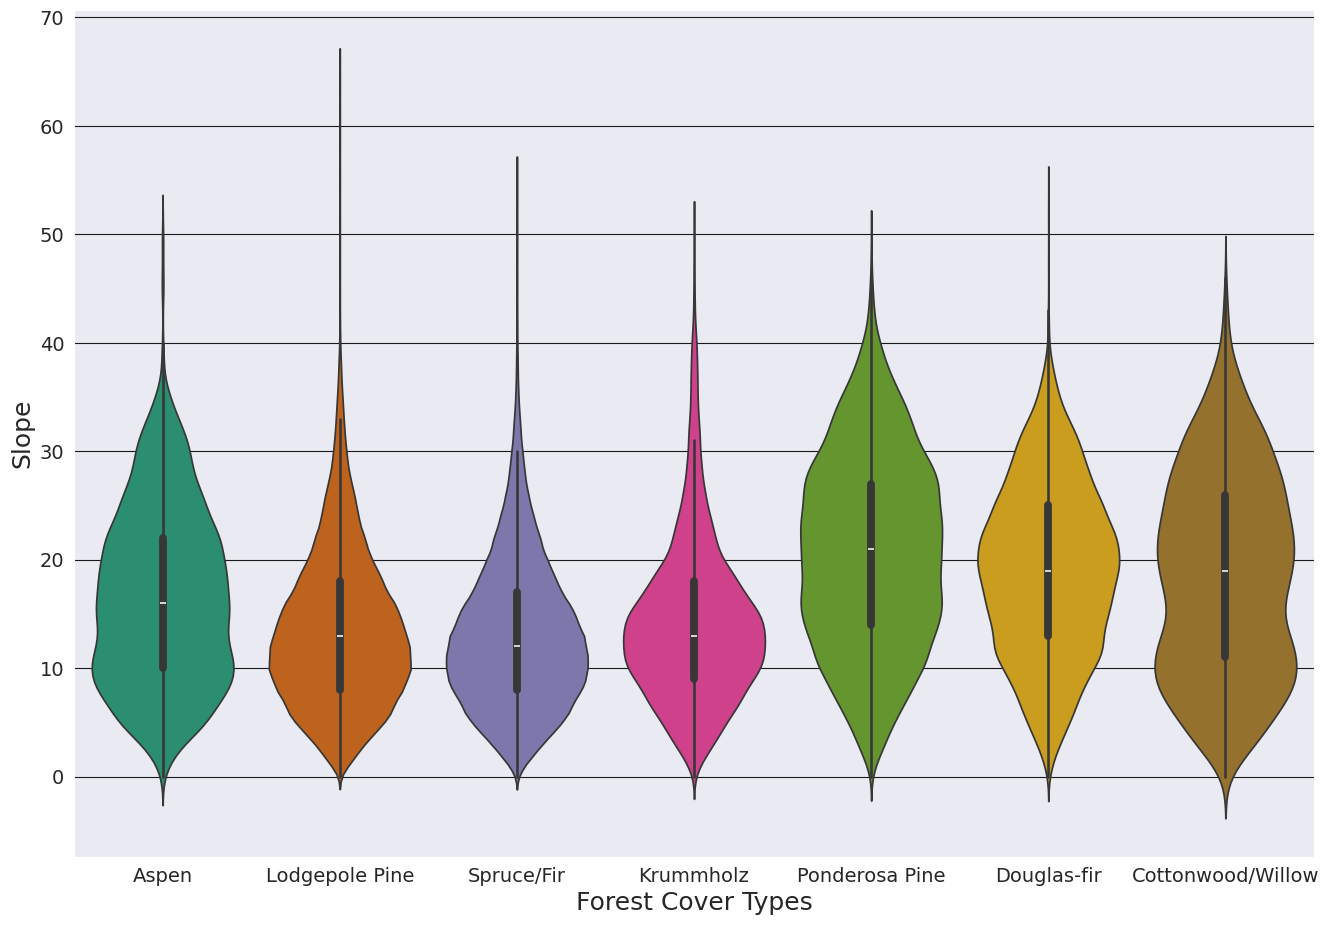

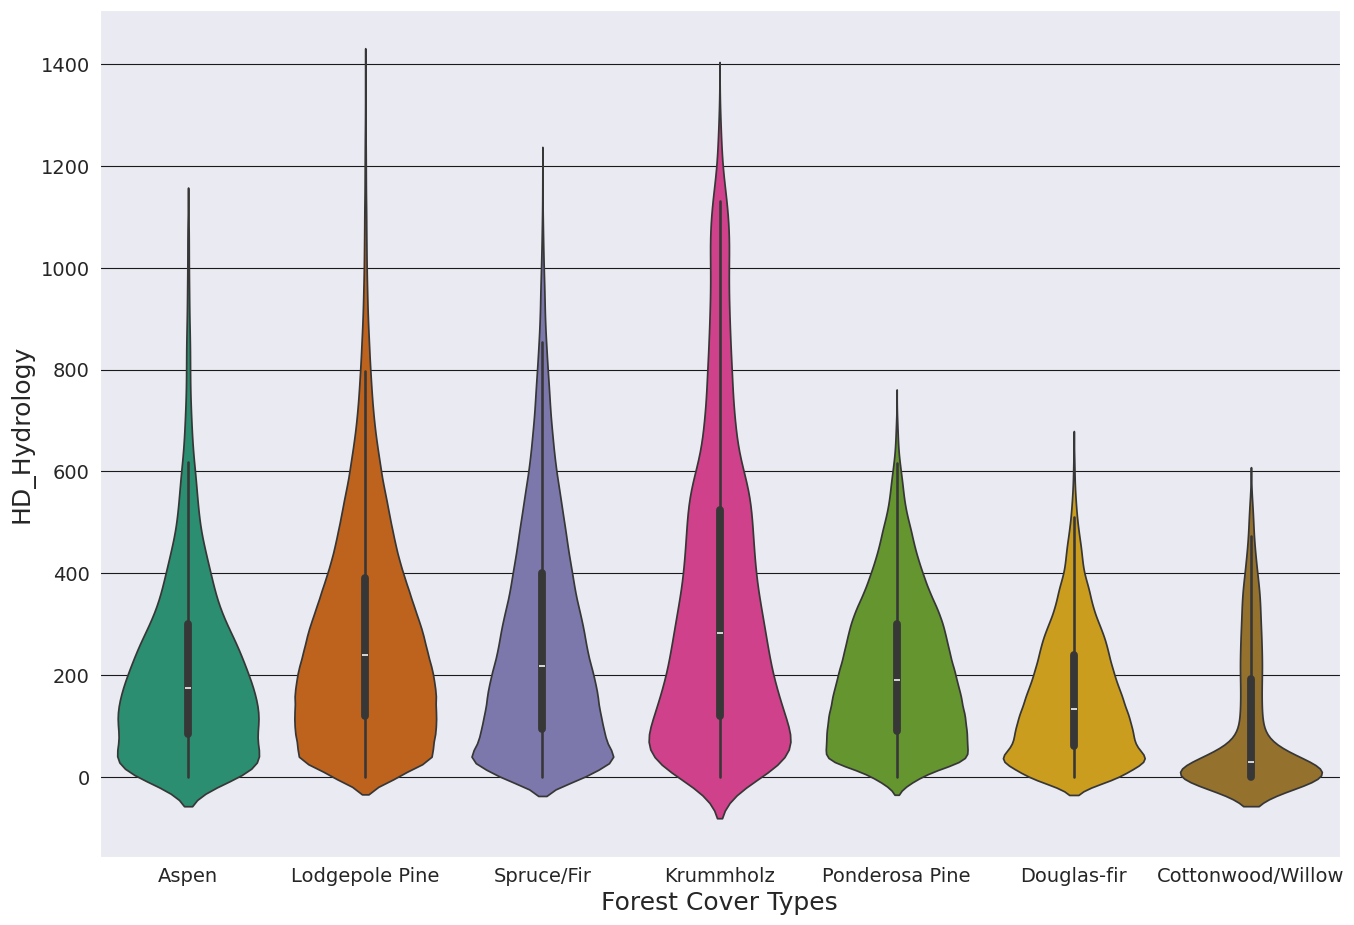

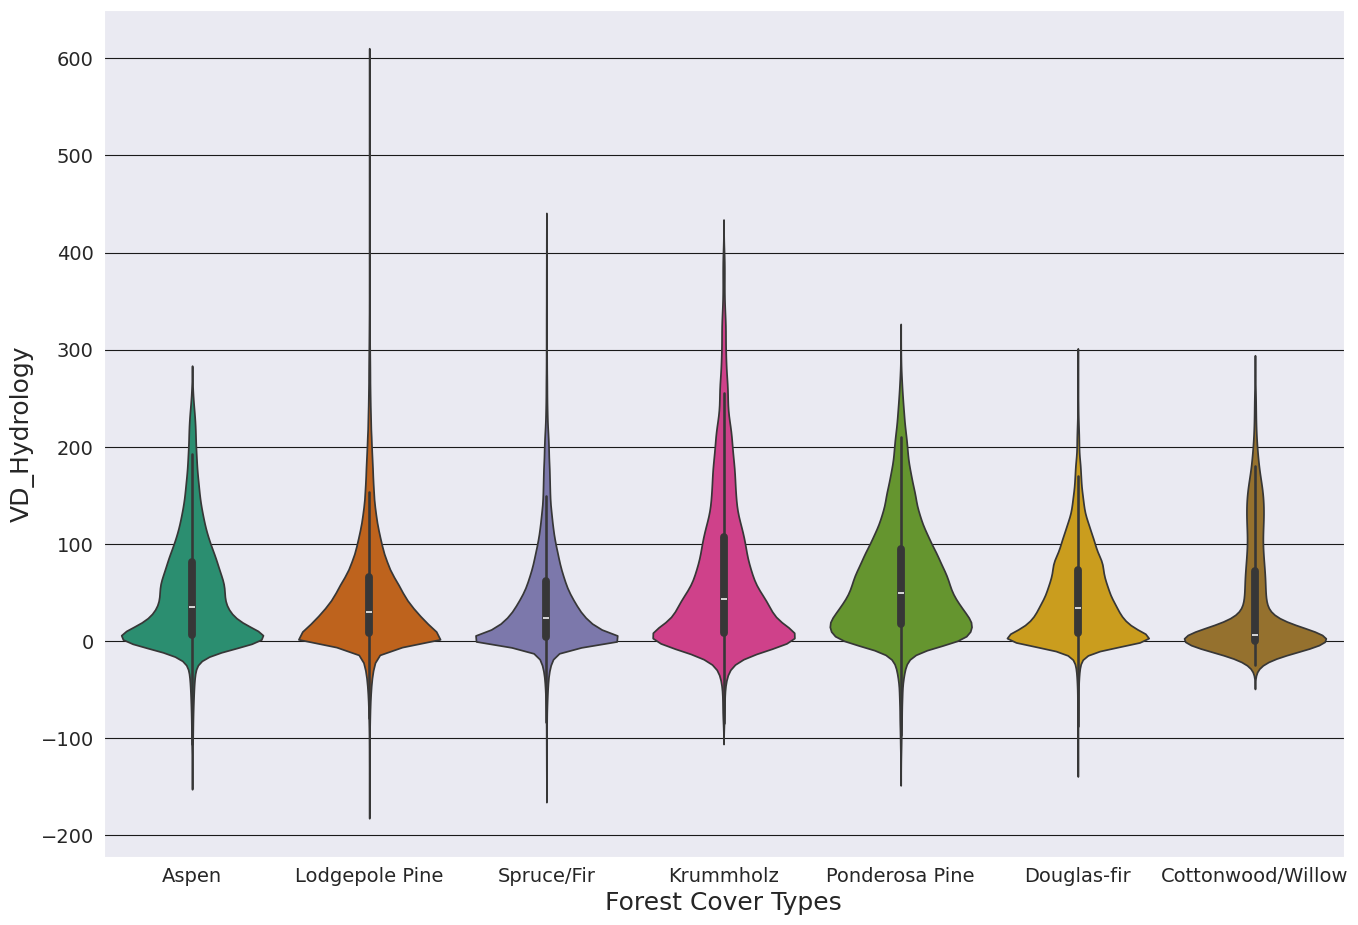

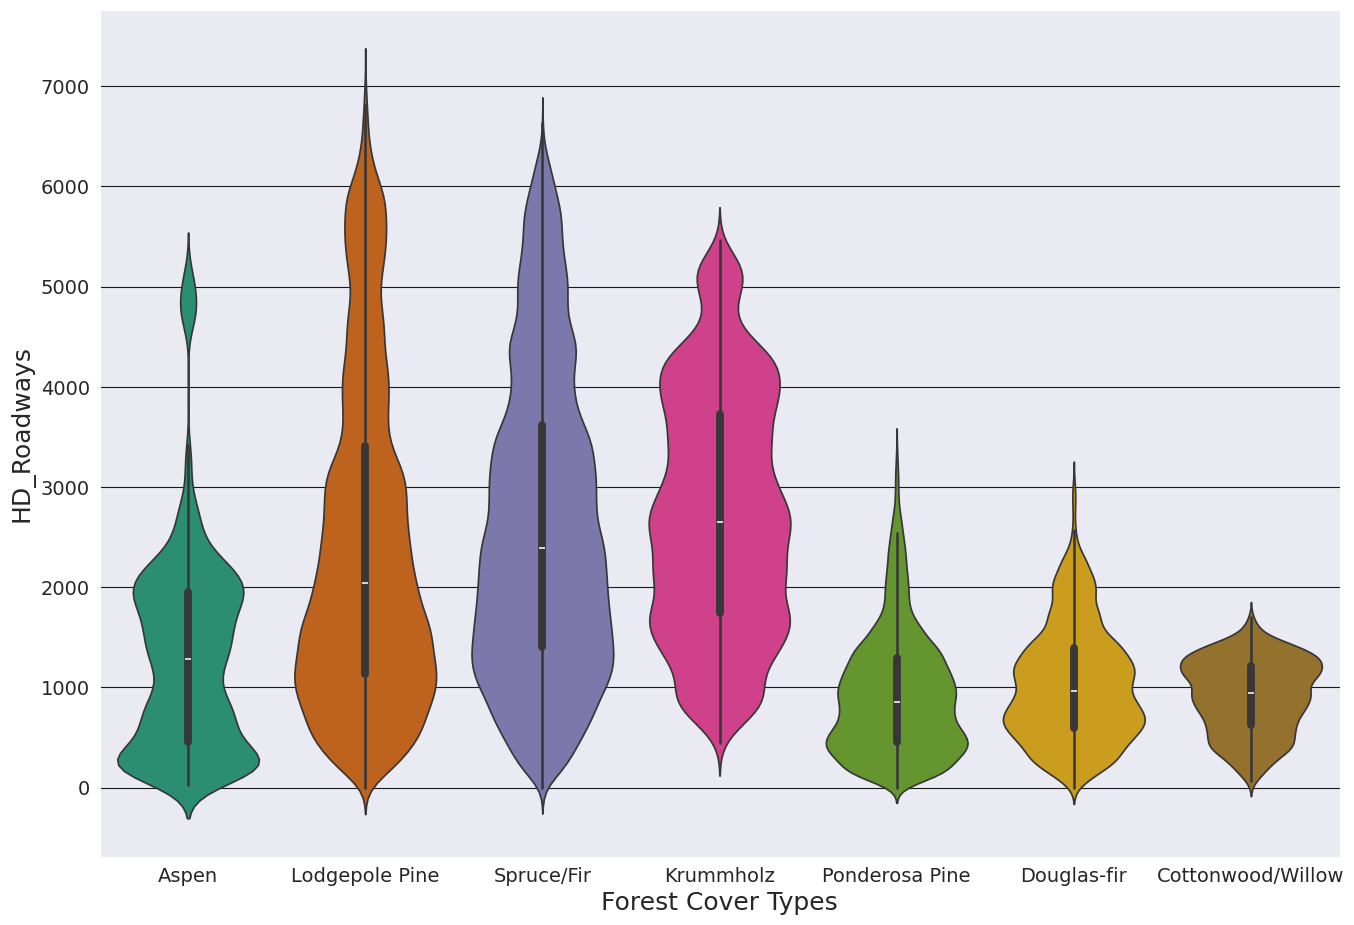

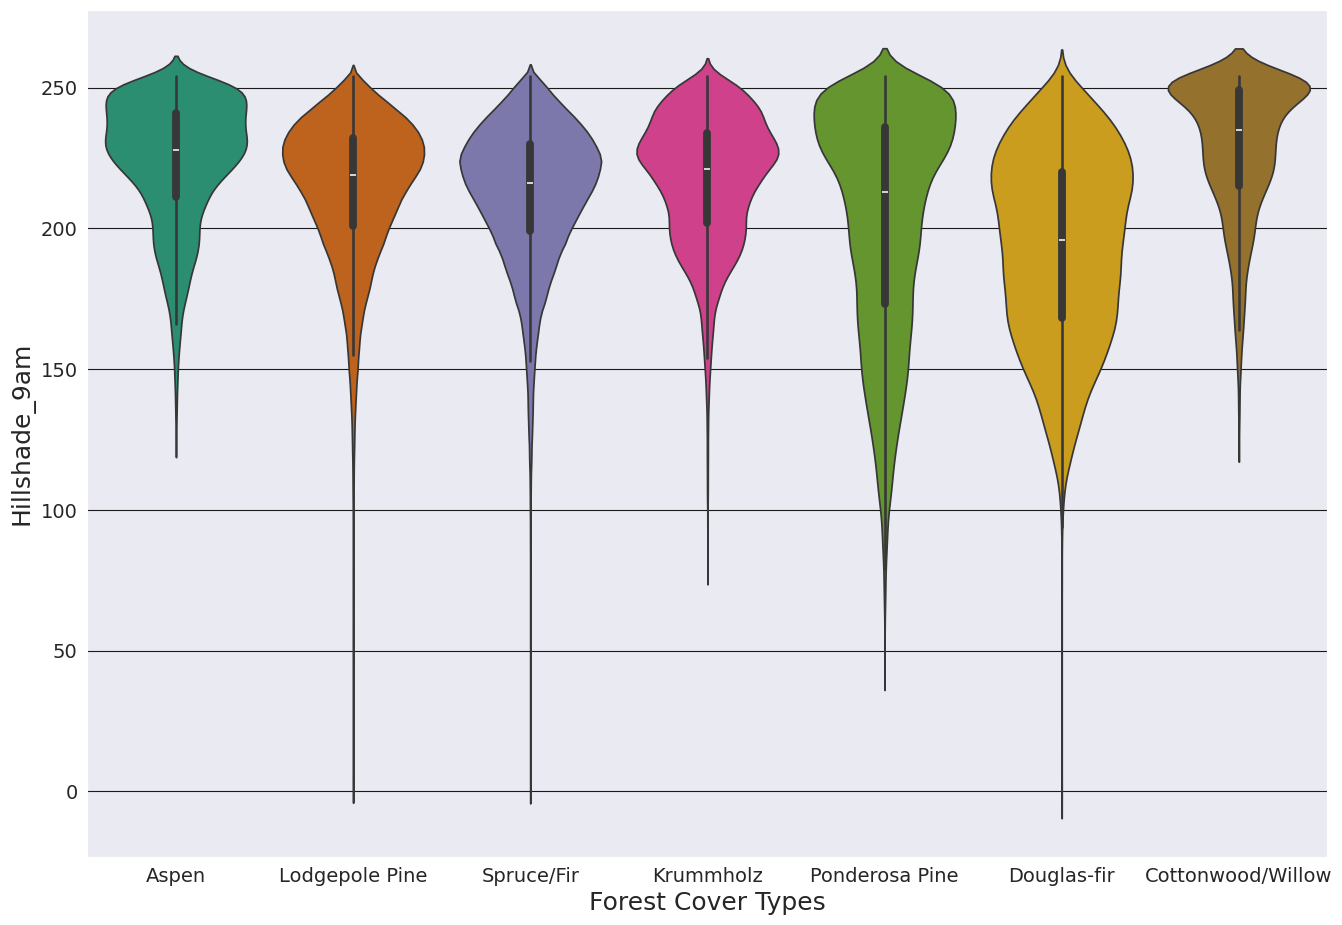

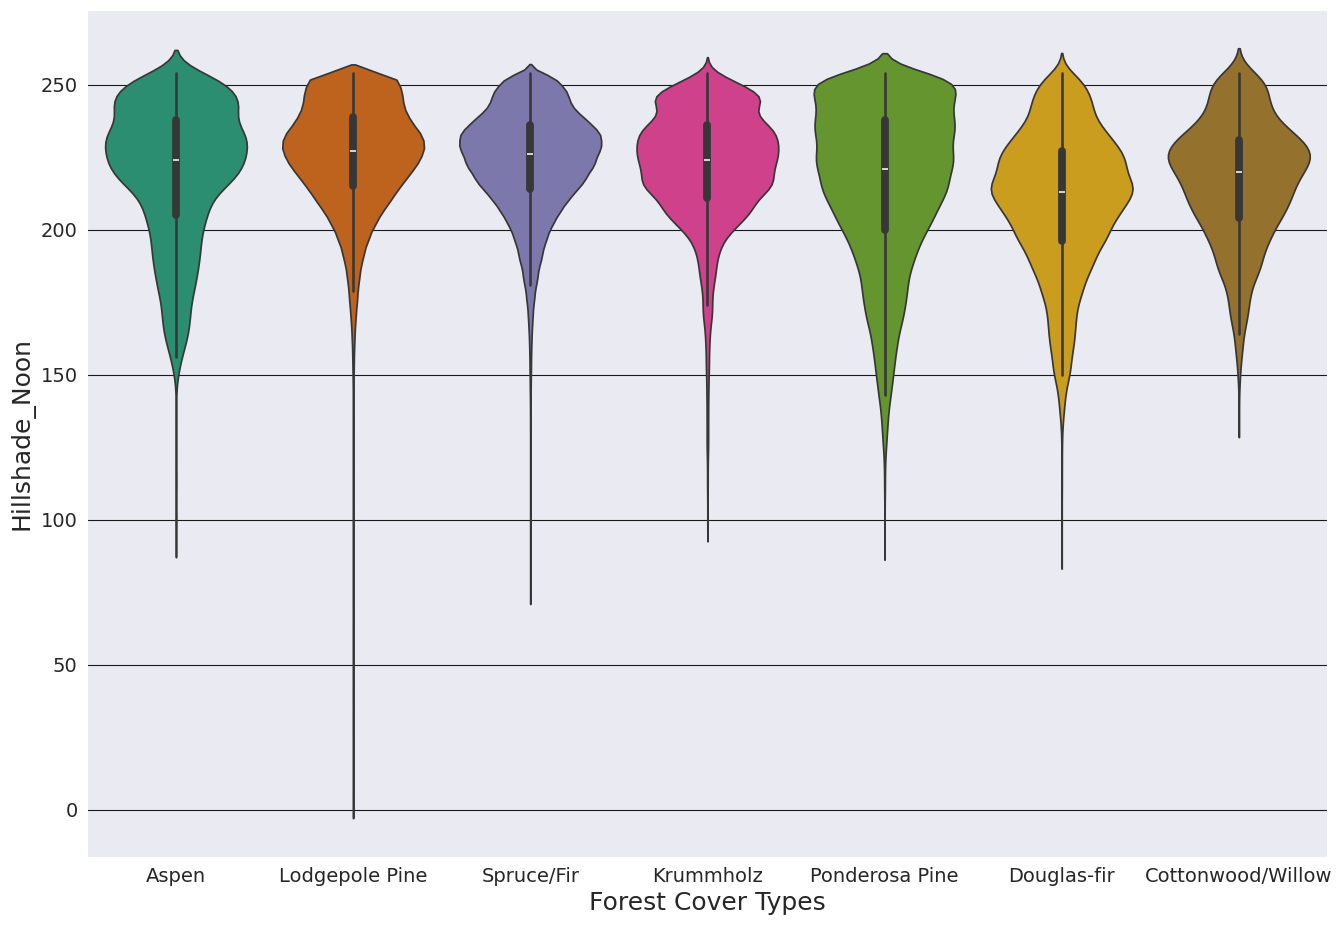

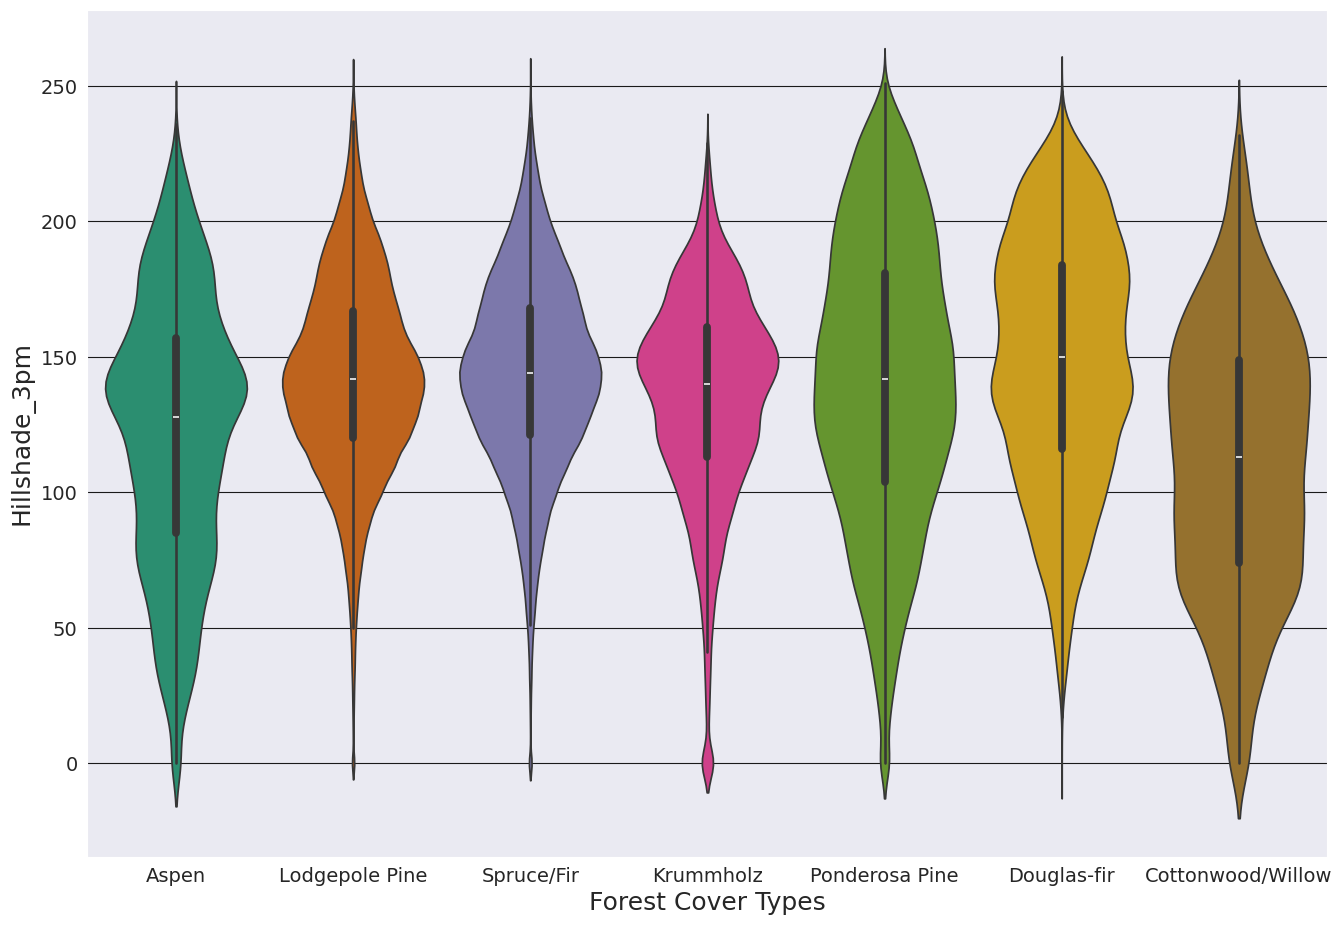

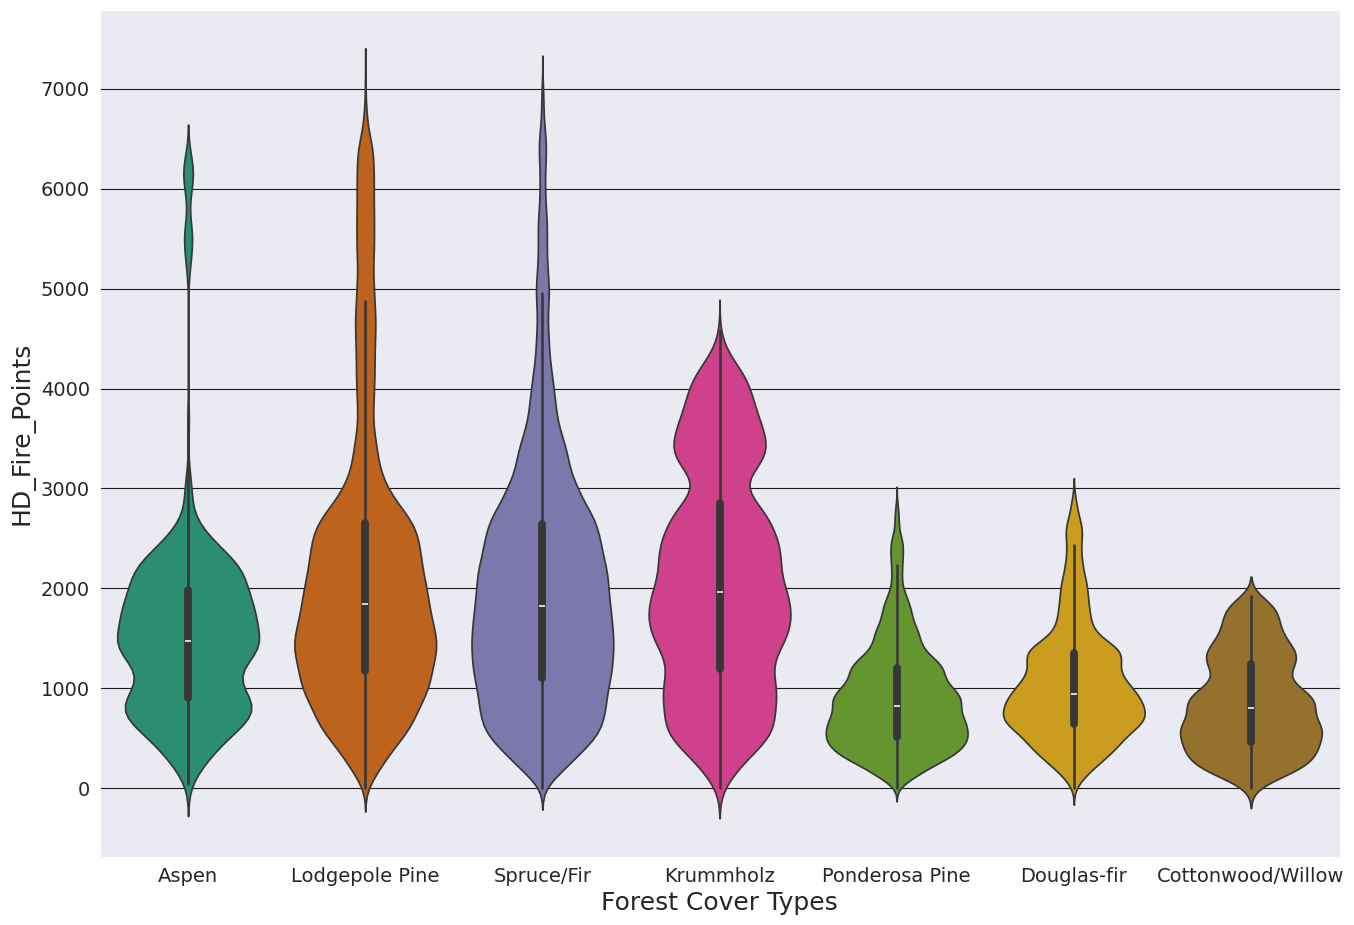

In [133]:

# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# set target variable
target = df['Cover_Type']

# loop for violin plot
for i in range(0, len(numeric_features)):
    plt.subplots(figsize=(16,11))
    sns.violinplot(data=df[numeric_features], x=target, y=numeric_features[i],palette='Dark2')
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.xlabel('Forest Cover Types', size=18)
    plt.ylabel(numeric_features[i], size=18)
    plt.show()

#### **INSIGHTS**
- Elevation
    - **'Cottonwood/Willow'** has the most forest cover at elevation between 2000m - 2500m.
    - **'Krummholz'** has observations of most elevated trees ranging as low as ~2800m to as high as ~3800m.
- Aspect
    -  This feature has a normal distribution for each class.
- Slope
    -  Slope has lower values compared to most features as its measured in degrees and least to Aspect which is also measured in degrees.
    -  It has the least maximum value of all features. Looking at the plot we can say that it belongs to `Cover_Type2`.
    -  All classes have dense slope observations between 0-20 degrees.
- `Hillshade_9am` and `Hillshade_Noon` are left or negatively skewed distribution where they take on max value between 200-250 index value for most observation in each class.

    

<Axes: xlabel='Hillshade_Noon', ylabel='Hillshade_3pm'>

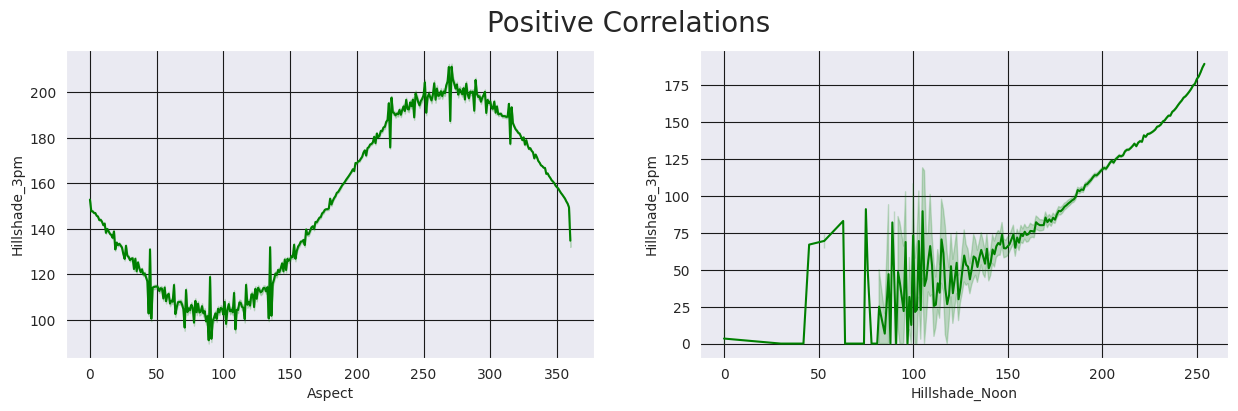

In [134]:
fig, axs = plt.subplots(ncols=2,figsize=(15,4))
fig.suptitle("Positive Correlations",fontsize='20')

sns.lineplot(x= "Aspect",y="Hillshade_3pm",data=df,color='green',ax=axs[0])
sns.lineplot(x= "Hillshade_Noon",y="Hillshade_3pm",data=df,color='green',ax=axs[1])

<Axes: xlabel='Hillshade_Noon', ylabel='Slope'>

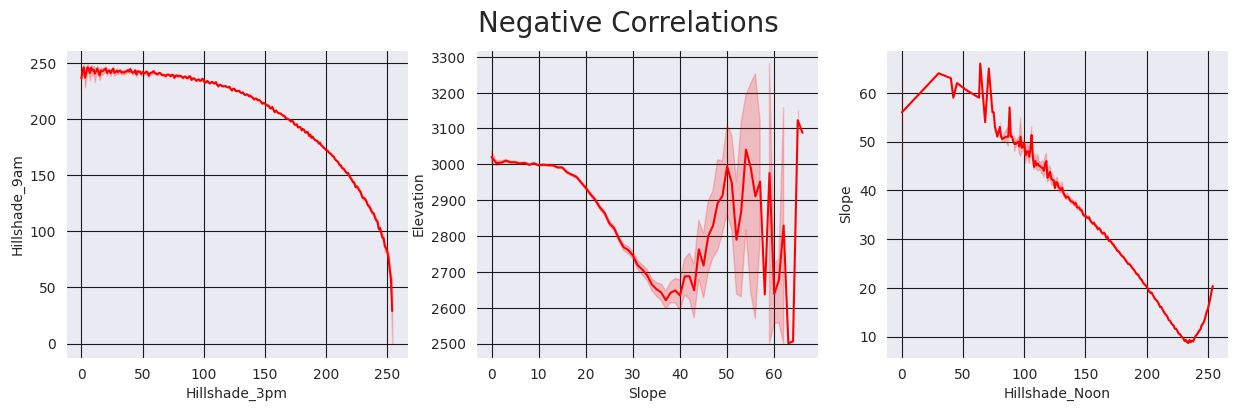

In [138]:
fig, axs = plt.subplots(ncols=3,figsize=(15,4))
fig.suptitle("Negative Correlations",fontsize='20')

sns.lineplot(x= "Hillshade_3pm",y="Hillshade_9am",data=df,color='red',ax=axs[0])
sns.lineplot(x= "Slope",y="Elevation",data=df,color='red',ax=axs[1])
sns.lineplot(x= "Hillshade_Noon",y="Slope",data=df,color='red',ax=axs[2])

### **Final Report**
- Forest cover type **'Lodgepole Pine'** has largest forest cover and **'Cottonwood/Willow'** has lowest forest cover.
- **Cache_La_Poudre** and **Neota** Wilderness Areas have same number of forest covers.
- Most of the data is abundant with soil type **29 and 23**.
- There is a positive correlation between Elevation and Distance to Roadways.
- There is a negative correlation between hillshade index at 9am and 3pm.
- Horizontal_Distance_To_Roadways has the most spread out data of all features.
- Cottonwood/Willow' has the most forest cover at elevation between 2000m - 2500m